In [1]:
from sklearn.datasets import load_iris

data = load_iris()

from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = data.data
y = data.target

acc = []

for i in range(5):
    X_r,y_r = resample(X,y,random_state=i)
    model = SVC(kernel='linear',random_state=0)
    model.fit(X_r,y_r)
    acc.append(accuracy_score(y,model.predict(X)))

    print(f'Iteration {i+1}, Accuracy: {acc[-1]:.4f}')

print(f'Mean Accuracy over 5 iterations: {sum(acc)/len(acc):.4f}')

Iteration 1, Accuracy: 0.9867
Iteration 2, Accuracy: 0.9733
Iteration 3, Accuracy: 0.9733
Iteration 4, Accuracy: 0.9800
Iteration 5, Accuracy: 0.9800
Mean Accuracy over 5 iterations: 0.9787


Mean of sample means: 0.5007


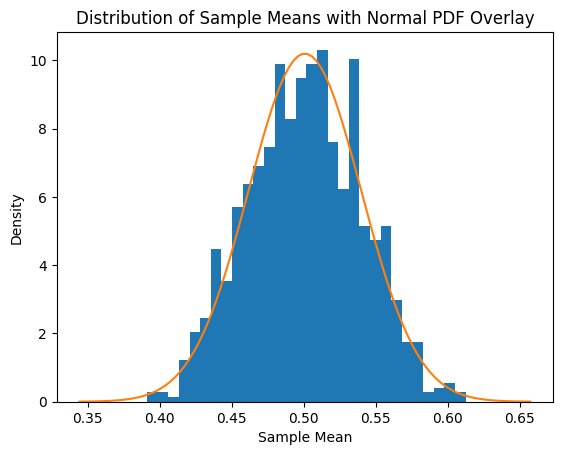

In [2]:
import numpy as np
from scipy import stats

sample_size = 55
n = 1000

means = [np.mean(np.random.uniform(0,1,sample_size)) for _ in range(n)]
print(f'Mean of sample means: {np.mean(means):.4f}')

import matplotlib.pyplot as plt

plt.hist(means,bins=30,density=True)
mu = np.mean(means)
sigma = np.std(means)
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)    
plt.plot(x,stats.norm.pdf(x, mu, sigma))
plt.title('Distribution of Sample Means with Normal PDF Overlay')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.show()

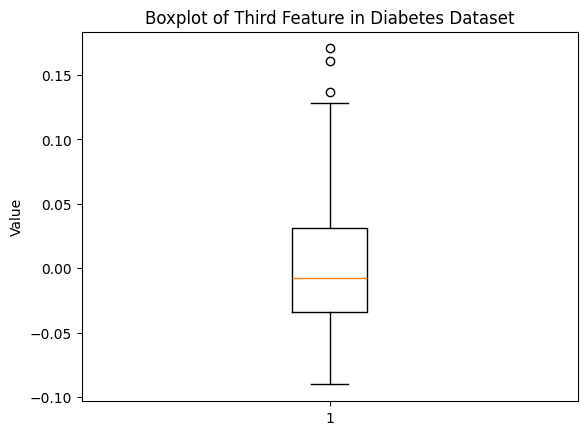

Outlier Lower Bound: -0.1324, Upper Bound: 0.1295


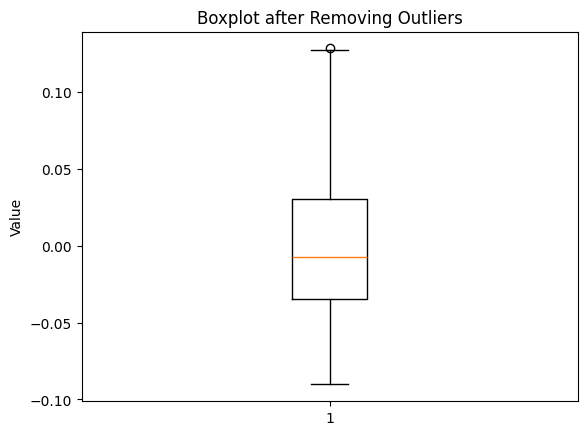

In [8]:
from sklearn.datasets import load_diabetes

data = load_diabetes()

import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame(data.data, columns=data.feature_names)
feature = df['bmi']
plt.boxplot(feature)
plt.title('Boxplot of Third Feature in Diabetes Dataset')
plt.ylabel('Value')
plt.show()

Q3 = feature.quantile(0.75)
Q1 = feature.quantile(0.25)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(f'Outlier Lower Bound: {lower_bound:.4f}, Upper Bound: {upper_bound:.4f}')

removed = feature[(feature >= lower_bound) & (feature <= upper_bound)]

plt.boxplot(removed)
plt.title('Boxplot after Removing Outliers')
plt.ylabel('Value')
plt.show()


In [9]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import recall_score
db = load_diabetes()
X = db.data
y = (db.target > db.target.mean()).astype(int)


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)
y_pred = model.predict_proba(X_test)[:, 1]

y5 = (y_pred >= 0.5).astype(int)
r5 = recall_score(y_test, y5)
print(f'Recall at 0.5 threshold: {r5:.4f}')

y68 = (y_pred >= 0.68).astype(int)
r68 = recall_score(y_test, y68)
print(f'Recall at 0.68 threshold: {r68:.4f}')


Recall at 0.5 threshold: 0.4872
Recall at 0.68 threshold: 0.0256
